<a href="https://colab.research.google.com/github/vaishnaviS302004/machine-learning-lab/blob/main/polyreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('testdata.csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [4]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

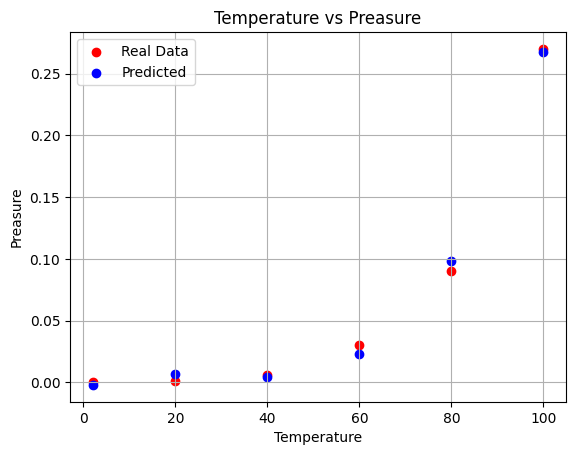

In [5]:
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(temperature) #Transforming the input data into polynomial features
linreg = LinearRegression()
linreg.fit(X_poly, preasure) #Fitting the model with the transformed data
#Predicting the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

#Visualising the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted_preasure, color='blue')
plt.title('Temperature vs Preasure')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

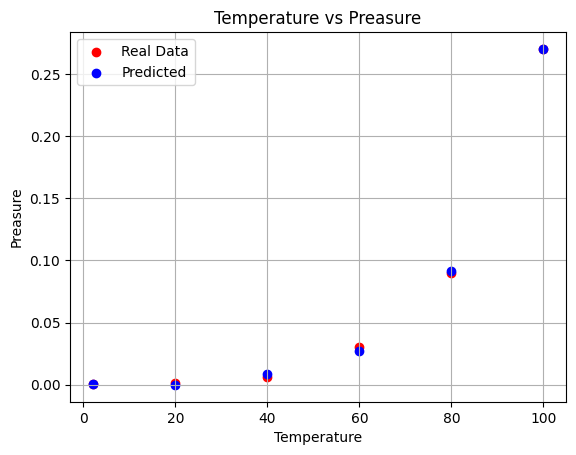

In [6]:
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# %%
df = pd.read_csv('testdata.csv')
df.head()
# %%
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output
# %%
# Modify the degree value here
degree = 4  # Experiment with different values (e.g., 2, 3, 4, 5)

polyreg = PolynomialFeatures(degree=degree)
X_poly = polyreg.fit_transform(temperature) #Transforming the input data into polynomial features
linreg = LinearRegression()
linreg.fit(X_poly, preasure) #Fitting the model with the transformed data
#Predicting the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

#Visualising the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted_preasure, color='blue')
plt.title('Temperature vs Preasure')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

<ipython-input-7-74f6200e399c>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)


Mean Squared Error: 0.5036266718912911


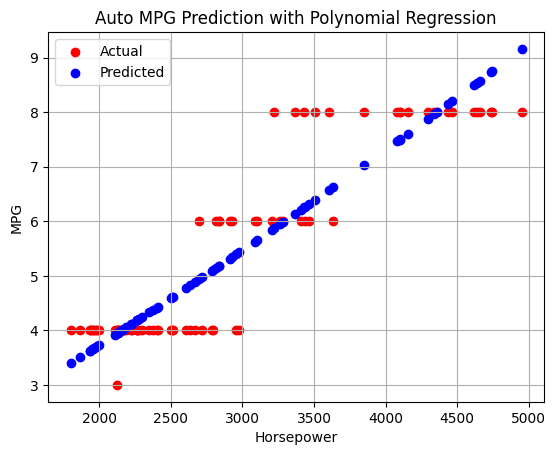

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Auto MPG dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)
df = df.dropna()  # Remove rows with missing values

# Select features and target variable
X = df[['Horsepower']]  # Use Horsepower as the feature
y = df['MPG']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the degree of the polynomial
degree = 2  # Experiment with different values

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the results
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.title('Auto MPG Prediction with Polynomial Regression')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid()
plt.show()